# Import Packages

In [1]:
import numpy as np
import pandas as pd

import datetime
import time 

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

## Create dummy data

Text(0.5, 1.0, 'The data')

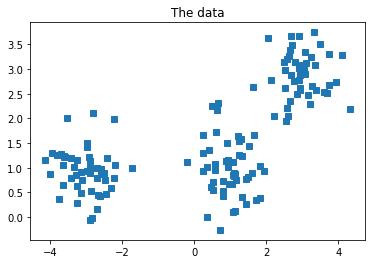

In [2]:
nPerClust = 50

# blur around centroid (std units)
blur = 0.5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose(np.concatenate((a,b,c),axis=1) )

# show the data
plt.figure(figsize=(6,4))
plt.plot(data[:,0],data[:,1],'s')
plt.title('The data')

## fitting dbscan

In [24]:
clustmodel = DBSCAN(eps=0.6,min_samples=4,metric='euclidean')
clustmodel = clustmodel.fit(data)

`eps` float, default=0.5

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

`min_samples` int, default=5

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

`metric` string, or callable, default=’euclidean’

The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

`algorithm`{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

mapping cluster: 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2 -1  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2] 

cluster center: 
 [[ 0.96897789  0.98238055]
 [-3.03875759  0.86460483]
 [ 2.95412121  2.88892562]]


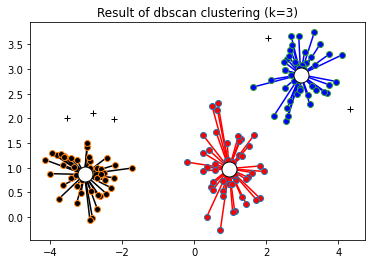

In [25]:
dnclust = clustmodel.labels_
print('mapping cluster: \n', dnclust,'\n')
# number of clusters
nclust = max(dnclust)+1 # +1 for indexing

# compute clusters center
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data[dnclust==ci,0]) # cluster centers on x-axis
    cents[ci,1] = np.mean(data[dnclust==ci,1]) # cluster centers on y-axis
print('cluster center: \n', cents)

# draw lines from each data point to the cluster center of each cluster
lineColors = 'rkbgm'
for i in range(len(data)):
    #if data point is noise
    if dnclust[i]==-1:
        plt.plot(data[i,0],data[i,1],'k+')
    #if data point have cluster
    else:
        plt.plot([ data[i,0], cents[dnclust[i],0] ],[ data[i,1], cents[dnclust[i],1] ],lineColors[dnclust[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data[dnclust==i,0],data[dnclust==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='w',markersize=15)
plt.title(f'Result of dbscan clustering (k={str(nclust)})')


plt.show()

In [ ]:
cluster1 = [(-4,-2),(0,15),(5,7),(2,8)] # claster1
data = [-3,2,6,4] #cluster1

## testing the parameter space

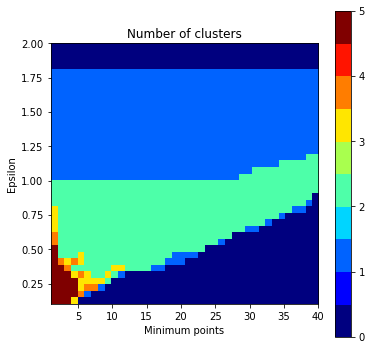

In [4]:
# parameter ranges
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,41)

# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)

# for colormap discretization
plt.figure(figsize=(6,6))
aa = plt.imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
plt.colorbar(aa)

plt.xlabel('Minimum points')
plt.ylabel('Epsilon')
plt.title('Number of clusters')
plt.show()

# Dbscan vs Kmeans

(2000, 2)


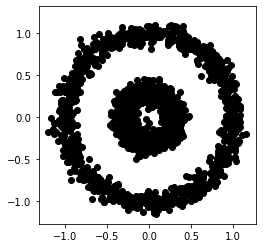

In [28]:
## Lets create nonlinear clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

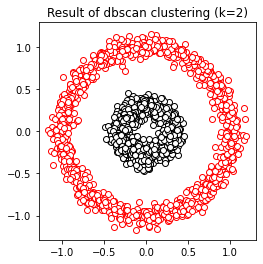

In [6]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=2).fit(circdata)
dnclust = clustmodel.labels_

nclust = max(dnclust)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[dnclust==i,0],circdata[dnclust==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[dnclust==-1,0],circdata[dnclust==-1,1],'k+')
plt.axis('square')
plt.title(f'Result of dbscan clustering (k={str(nclust)})')

plt.show()

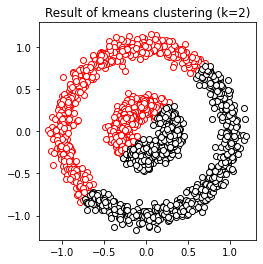

In [7]:
## kmeans

kmeans = KMeans(n_clusters=2,init='k-means++').fit(circdata)
kmclust = kmeans.predict(circdata)

nclust = max(kmclust)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[kmclust==i,0],circdata[kmclust==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[kmclust==-1,0],circdata[kmclust==-1,1],'k+')
plt.axis('square')
plt.title(f'Result of kmeans clustering (k={str(nclust)})')

plt.show()

# Apply dbscan on customers data

There are 200 entires of the mall customer demographic data. Here is a quick overview of the dataset columns:

`CustomerID`: the customer ID indexed by the membership system

`Gender`: the gender of the mall customer

`Age`: the age of the mall member

`Annual Income (k$)`: the annual income of the customers with a unit of 1000 dollars

`Spending Score (1-100)`: the spending score from 1-100. 100 means the customer is a active shopper

In [29]:
cust = pd.read_csv('mall_customers.csv',index_col='CustomerID')
print('Data loaded on', datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S'))

Data loaded on 2021-09-06 13:17:34


## Data exploration

In [30]:
# Check dataset shape
print('Number of rows:',cust.shape[0])
print('Number of columns:',cust.shape[1])

Number of rows: 200
Number of columns: 4


In [31]:
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Showing the statistical summary, could help us on preliminary investigation on dataset

In [32]:
cust.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


*Statistical summary metrics*

Categorical
- `count` - number of your rows/data point
- `unique` - number of unique values
- `top` - most appear values

Continuous
- `freq` - number of data point to the corresponding top values
- `mean`- mean/average
- `std` - standard deviation
- `min` - minimum value
- `25%` - Quartile-1(Q1)
- `50%` - Median
- `75%` - Quartile-3(Q3)
- `max` - maximum value

### Visualize the data

Showing also histogram to get more intuition about your data distribution

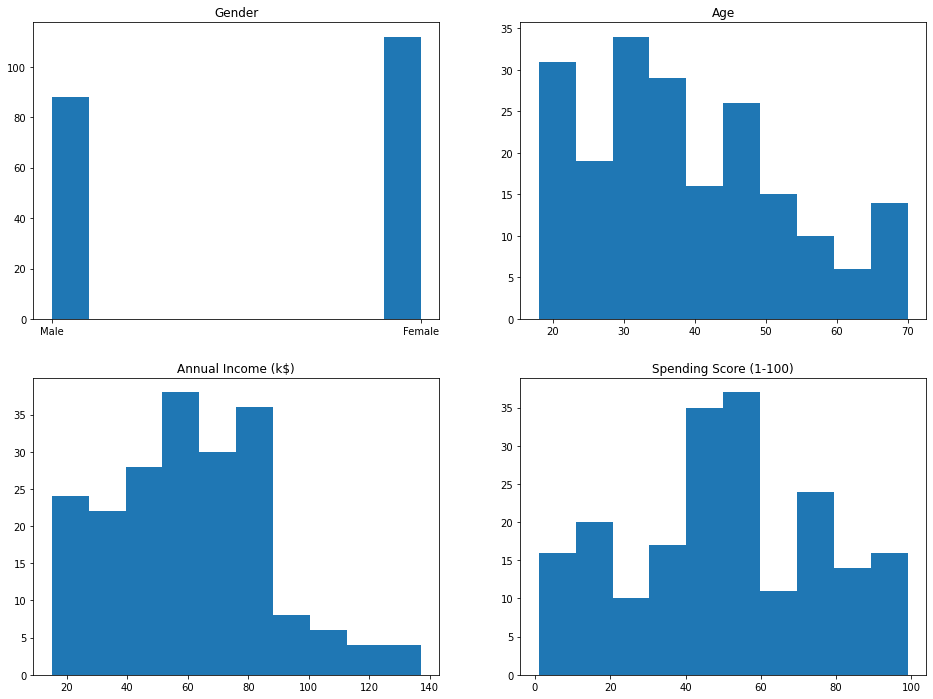

In [33]:
cols = list(cust.columns)

plt.figure(figsize=(16,12))
for i,col in enumerate(cols, start = 1):
    plt.subplot(2,2,i)
    plt.hist(cust[col])
    plt.title(col)
plt.show()

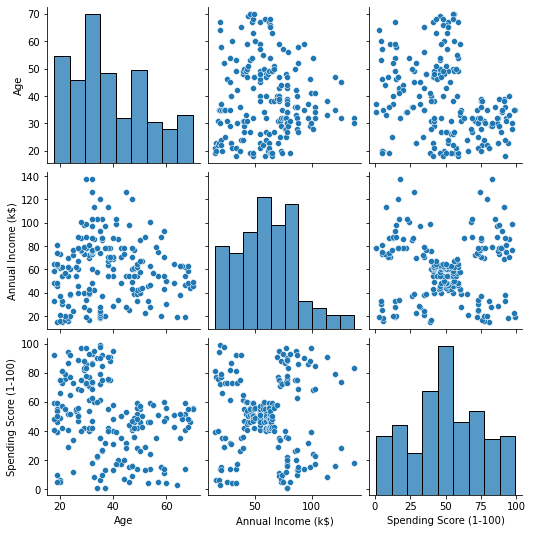

In [34]:
# Showing relationship between features
sns.pairplot(cust[cols])
plt.show()

## Data Preprocessing

Since dbscan requires continuous data type, we then transform some data that have no fulfill the requirement

In [36]:
# Transform gender into 0 or 1 identifier
cust['Gender'] = cust['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [37]:
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## Fitting dbscan

Assume that we use `Annual Income` , `Spending Score` and `Age` as reference to build the model.

            Annual Income (k$)  Spending Score (1-100)
CustomerID                                            
1                           15                      39
2                           15                      81
3                           16                       6
4                           16                      77
5                           17                      40


Text(0, 0.5, 'spending score')

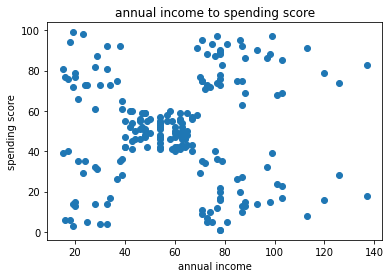

In [38]:
# select the features
feats = cust.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

print(feats.head(5))

plt.figure(figsize=(6,4))
plt.scatter(feats['Annual Income (k$)'],feats['Spending Score (1-100)'])
plt.title('annual income to spending score')
plt.xlabel('annual income')
plt.ylabel('spending score')

In [39]:
scaler = StandardScaler()

feats[['Annual Income (k$)','Spending Score (1-100)']] = \
    scaler.fit_transform(feats[['Annual Income (k$)','Spending Score (1-100)']])

feats.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


mapping cluster: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1] 

cluster center: 
 []


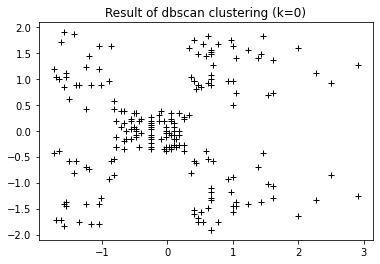

In [53]:
clustmodel = DBSCAN(eps=0.4,min_samples=80).fit(feats)
dnclust = clustmodel.labels_
print('mapping cluster: \n', dnclust,'\n')

# number of clusters
nclust = max(dnclust)+1 # +1 for indexing

# compute clusters center
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(feats.iloc[dnclust==ci,0]) # cluster centers on x-axis
    cents[ci,1] = np.mean(feats.iloc[dnclust==ci,1]) # cluster centers on y-axis
print('cluster center: \n', cents)

# draw lines from each feats point to the cluster center of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(feats)):
    #if data point is noise
    if dnclust[i]==-1:
        plt.plot(feats.iloc[i,0],feats.iloc[i,1],'k+')
    #if data point have cluster
    else:
        plt.plot([ feats.iloc[i,0], cents[dnclust[i],0] ],
                 [ feats.iloc[i,1], cents[dnclust[i],1] ])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(feats.iloc[dnclust==i,0],feats.iloc[dnclust==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the cluster center locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='w',markersize=15)
plt.title(f'Result of dbscan clustering (k={str(nclust)})')


plt.show()

## testing the parameter spaces

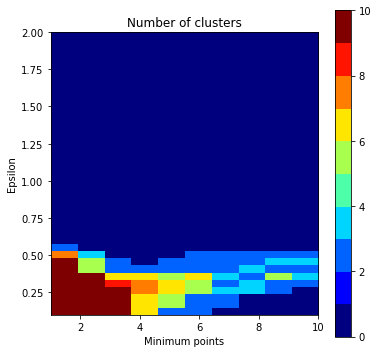

In [48]:
# parameter ranges
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,11)

# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(feats)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)

# for colormap discretization
plt.figure(figsize=(6,6))
aa = plt.imshow(results[:,:,0],vmin=0,vmax=10,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=5,origin='lower',cmap=cm.get_cmap('jet',10))
plt.colorbar(aa)

plt.xlabel('Minimum points')
plt.ylabel('Epsilon')
plt.title('Number of clusters')
plt.show()